In [21]:
import pandas as pd
import numpy as np

training_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print(training_data.head())

print(training_data.info())
print(training_data.isna().sum())
print(test_data.isna().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64


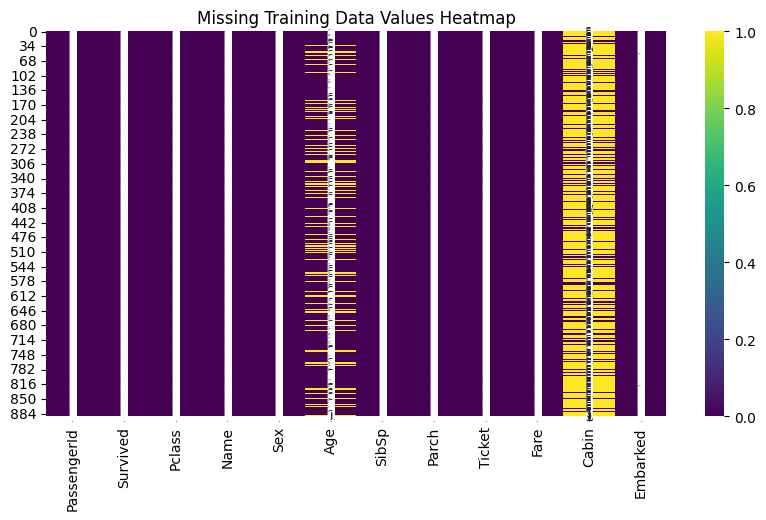

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_training_data = training_data.isnull().sum().sort_values(ascending=False)
print(missing_training_data)

plt.figure(figsize=(10, 5))
sns.heatmap(training_data.isnull(), annot=True, cmap='viridis')
plt.title('Missing Training Data Values Heatmap')
plt.show()

In [23]:
training_data = training_data.drop(columns=['Cabin'])
test_data = test_data.drop(columns=['Cabin'])

training_data['Age'].fillna(training_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

training_data['Embarked'].fillna(training_data['Embarked'].mode()[0], inplace=True)

test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

print(training_data.isna().sum())
print(test_data.isna().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipykernel_11299/250665578.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training_data['Age'].fillna(training_data['Age'].median(), inplace=True)
/tmp/ipykernel_11299/250665578.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [24]:
print("Duplicates #:",training_data.duplicated().sum())
print(training_data[training_data.duplicated()])

Duplicates #: 0
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []


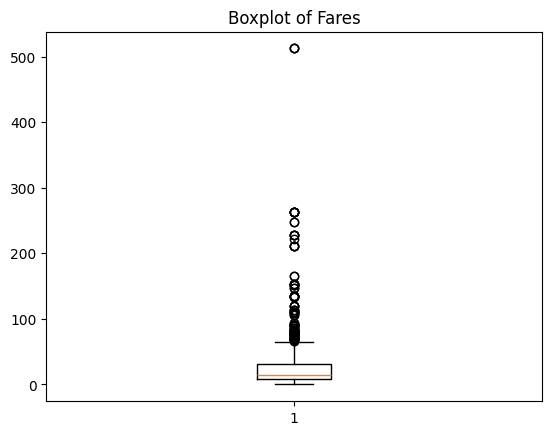

In [25]:
plt.boxplot(training_data['Fare'])
plt.title('Boxplot of Fares')
plt.show()

In [26]:
Q1 = training_data['Fare'].quantile(0.25)
Q3 = training_data['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
 
outliers_number = training_data[(training_data['Fare'] < lower_bound) | (training_data['Fare'] > upper_bound)]
print("Outliers #:", outliers_number.shape[0])

training_data['Fare'] = training_data['Fare'].clip(lower_bound, upper_bound)

Outliers #: 116


In [27]:
check_outliers = training_data[(training_data['Fare'] < lower_bound) | (training_data['Fare'] > upper_bound)]
print("New Outliers #:", check_outliers.shape[0])

New Outliers #: 0


In [28]:
print(training_data.select_dtypes(include='object'))

                                                  Name     Sex  \
0                              Braund, Mr. Owen Harris    male   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                               Heikkinen, Miss. Laina  female   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                             Allen, Mr. William Henry    male   
..                                                 ...     ...   
886                              Montvila, Rev. Juozas    male   
887                       Graham, Miss. Margaret Edith  female   
888           Johnston, Miss. Catherine Helen "Carrie"  female   
889                              Behr, Mr. Karl Howell    male   
890                                Dooley, Mr. Patrick    male   

               Ticket Embarked  
0           A/5 21171        S  
1            PC 17599        C  
2    STON/O2. 3101282        S  
3              113803        S  
4              373450        S  
..       

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

training_data['Sex'] = label_encoder.fit_transform(training_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])
training_data = pd.get_dummies(training_data, columns=['Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
scaler.fit(training_data[['Age','Fare']])

# Transform both train and test
training_data[['Age','Fare']] = scaler.transform(training_data[['Age','Fare']])
test_data[['Age','Fare']] = scaler.transform(test_data[['Age','Fare']])


In [33]:
print("Training dataset after data cleaning:", training_data.head())
print("\nTest dataset after data cleaning:", test_data.head())

Training dataset after data cleaning:    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    1 -0.565736      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.663861      1   
2                             Heikkinen, Miss. Laina    0 -0.258337      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312      1   
4                           Allen, Mr. William Henry    1  0.433312      0   

   Parch            Ticket      Fare  Embarked_Q  Embarked_S  
0      0         A/5 21171 -0.820552       False        True  
1      0          PC 17599  2.031623       False       False  
2      0  STON/O2. 3101282 -0.787578       False        True  
3      0            1138